This script processes the hard hat detection dataset available at https://www.kaggle.com/datasets/andrewmvd/hard-hat-detection. The dataset comprises two separate files containing images and corresponding annotations for each image. The purpose of this script is to pair each image with its respective annotation, enabling seamless integration of the data into machine learning workflows.

In [21]:
import os
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import json

In [2]:
images_path = 'C:\\Users\\Connor\\Desktop\\Hard Hat Recongnition\\Data\\images'
annotation_path = 'C:\\Users\\Connor\\Desktop\\Hard Hat Recongnition\\Data\\annotations'

In [3]:
# Load XML annotations to dict
annotations = {}
for filename in os.listdir(annotation_path):
        tree = ET.parse(os.path.join(annotation_path, filename))
        root = tree.getroot()
        annotations[filename] = root  

In [4]:
annotations

{'hard_hat_workers0.xml': <Element 'annotation' at 0x000002033F96B740>,
 'hard_hat_workers1.xml': <Element 'annotation' at 0x000002033F96E700>,
 'hard_hat_workers10.xml': <Element 'annotation' at 0x000002033F980900>,
 'hard_hat_workers100.xml': <Element 'annotation' at 0x000002033F96B6F0>,
 'hard_hat_workers1000.xml': <Element 'annotation' at 0x000002033F9829D0>,
 'hard_hat_workers1001.xml': <Element 'annotation' at 0x000002033F983380>,
 'hard_hat_workers1002.xml': <Element 'annotation' at 0x000002033F990450>,
 'hard_hat_workers1003.xml': <Element 'annotation' at 0x000002033F9914E0>,
 'hard_hat_workers1004.xml': <Element 'annotation' at 0x000002033F992C50>,
 'hard_hat_workers1005.xml': <Element 'annotation' at 0x000002033F9A0090>,
 'hard_hat_workers1006.xml': <Element 'annotation' at 0x000002033F9A1B70>,
 'hard_hat_workers1007.xml': <Element 'annotation' at 0x000002033F89C090>,
 'hard_hat_workers1008.xml': <Element 'annotation' at 0x000002033F96B6A0>,
 'hard_hat_workers1009.xml': <Elem

In [12]:
# Pairs image and annotaion
dataset = []
for image_filename in os.listdir(images_path):
    base_filename = os.path.splitext(image_filename)[0]
    annotation_filename = base_filename + ".xml"
    if annotation_filename in annotations:
        image_path = os.path.join(images_path, image_filename)
        dataset.append({'image': image_path, 'annotation': annotations[annotation_filename]})

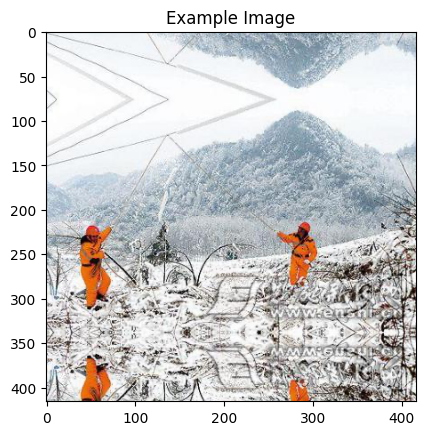

Annotation Data: <annotation>
    <folder>images</folder>
    <filename>hard_hat_workers1088.png</filename>
    <size>
        <width>416</width>
        <height>416</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>44</xmin>
            <ymin>214</ymin>
            <xmax>63</xmax>
            <ymax>239</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>281</xmin>
            <ymin>214</ymin>
            <xmax>299</xmax>
            <ymax>233</ymax>
        </bndbox>
    </object>
</annotation>


In [15]:
# Displays image with annotations
def display_example(example):
    img = cv2.imread(example['image'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Example Image")
    plt.show()
    print("Annotation Data:", ET.tostring(example['annotation'], encoding="unicode"))

# Change index to display example    
example = dataset[100]
display_example(example)


In [26]:
# Simplify XML annotations
def simplify_annotation(annotation):
    return ET.tostring(annotation, encoding="unicode")

data_list = []
# Add to list
for item in dataset:
    simplified_annotation = simplify_annotation(item['annotation'])
    data_list.append({'image': item['image'], 'annotation': simplified_annotation})
    
# Add to JSON file
with open('hard_hat_data.json', 'w', newline='') as f:
    writer = json.dump(data_list, f)